In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\aarya\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [12]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
books = pd.read_csv(path + "/books.csv")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


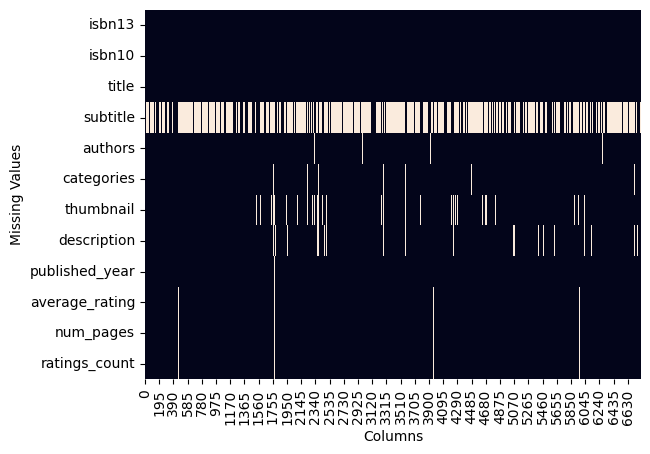

In [11]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [18]:
books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

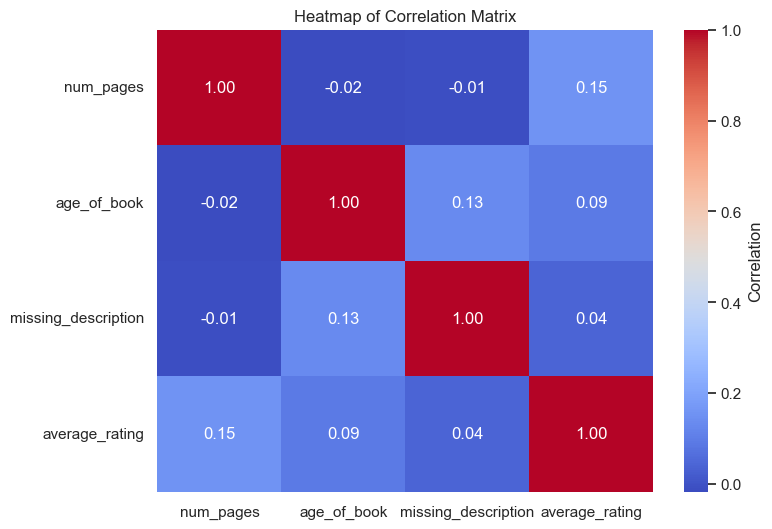

In [20]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation"})
heatmap.set_title("Heatmap of Correlation Matrix")

plt.show()

## Data Cleaning

In [62]:
books_missing = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
]

In [63]:
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [64]:
#books_missing["words_in_description"] = books_missing["description"].str.split().str.len()
books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()


C:\Users\aarya\AppData\Local\Temp\ipykernel_33688\3404253700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()


In [65]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,False,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,False,0,44.0,245


In [66]:
books_missing.loc[books_missing["words_in_description"].between(1,4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [67]:
books_missing.loc[books_missing["words_in_description"].between(5,14), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [68]:
books_missing.loc[books_missing["words_in_description"].between(15,24), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [71]:
books_missing.loc[books_missing["words_in_description"].between(25,34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [73]:
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25]
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,False,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,False,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,0,26.0,174


In [77]:
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"], books_missing_25_words[["title", "subtitle"]].astype(str).agg(" ".join, axis=1))
)
books_missing_25_words

C:\Users\aarya\AppData\Local\Temp\ipykernel_33688\3669962534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["title_and_subtitle"] = (


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,0,25.0,205,Spider's Web A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,False,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,False,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,0,26.0,174,I Am that Talks with Sri Nisargadatta Maharaj


In [79]:
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)
books_missing_25_words

C:\Users\aarya\AppData\Local\Temp\ipykernel_33688\1045935962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,0,25.0,205,Spider's Web A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,False,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,False,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,0,26.0,174,I Am that Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [81]:
(
books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index=False)
)

## Vector Search

In [1]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import pandas as pd
books = pd.read_csv("books_cleaned.csv")
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,Spider's Web A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,False,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,False,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,Journey to the East,9788173031014 This book tells the tale of a ma...
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,I Am that Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [4]:
print(books["tagged_description"])

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
2       9780006178736 A memorable, mesmerizing heroine...
3       9780006280897 Lewis' work on the nature of lov...
4       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
5192    9788172235222 On A Train Journey Home To North...
5193    9788173031014 This book tells the tale of a ma...
5194    9788179921623 Wisdom to Create a Life of Passi...
5195    9788185300535 This collection of the timeless ...
5196    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object


In [5]:
books["tagged_description"].to_csv("tagged_description.txt", sep="\n", index=False, header = False)

In [6]:
raw_documents = TextLoader("tagged_description.txt", encoding="utf-8").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

Created a chunk of size 1168, which is longer than the specified 1000
Created a chunk of size 1214, which is longer than the specified 1000
Created a chunk of size 1088, which is longer than the specified 1000
Created a chunk of size 1189, which is longer than the specified 1000
Created a chunk of size 1267, which is longer than the specified 1000
Created a chunk of size 2010, which is longer than the specified 1000
Created a chunk of size 1225, which is longer than the specified 1000
Created a chunk of size 1184, which is longer than the specified 1000
Created a chunk of size 1214, which is longer than the specified 1000
Created a chunk of size 1191, which is longer than the specified 1000
Created a chunk of size 1057, which is longer than the specified 1000
Created a chunk of size 1270, which is longer than the specified 1000
Created a chunk of size 1635, which is longer than the specified 1000
Created a chunk of size 1132, which is longer than the specified 1000
Created a chunk of s

In [7]:
documents[0] #just the description

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [8]:
db_books = Chroma.from_documents(
    documents,
    embedding=OpenAIEmbeddings())

In [9]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k = 10)
docs

[Document(id='a53cc6dd-9711-4fcf-967f-f6d40a012ed4', metadata={'source': 'tagged_description.txt'}, page_content="9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.\n9780786808373 Introducing your baby to birds, cats, dogs, and babies through fine art, illsutration and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing baby to some basic -- and sometimes playful -- information on the subjects."),
 Document(id='8f03f85f-ffee-4767-8466-896957708aa8', metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine ar

In [10]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,False,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [11]:
def retrieve_semantic_recommendations(
        query: str,
        top_k: int = 10
) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k = 50)

    books_list = []

    for i in range(0, len(recs)):
        books_list += [int(recs[i].page_content.strip('"').split()[0])]

    return books[books["isbn13"].isin(books_list)].head(top_k)

In [12]:
retrieve_semantic_recommendations("Book about elephants")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description
66,9780007162994,0007162995,If I Die in a Combat Zone,Tim O'Brien,"Vietnam War, 1961-1975",http://books.google.com/books/content?id=0qUtS...,Perhaps the best book to emerge from the Vietn...,2003.0,3.95,208.0,11.0,False,If I Die in a Combat Zone,9780007162994 Perhaps the best book to emerge ...
317,9780060954833,0060954833,African Nights,Kuki Gallmann,Biography & Autobiography,http://books.google.com/books/content?id=MRgkt...,"Lyrical, beautifully written tales of life in ...",2000.0,3.80,336.0,302.0,False,African Nights True Stories from the Author of...,"9780060954833 Lyrical, beautifully written tal..."
372,9780061131523,0061131520,The White Masai,Corinne Hofmann,Biography & Autobiography,http://books.google.com/books/content?id=uatyA...,A former European entrepreneur recounts how sh...,2006.0,3.43,320.0,4314.0,False,The White Masai,9780061131523 A former European entrepreneur r...
495,9780099448754,0099448750,The Elephant Vanishes,Haruki Murakami,Japan,http://books.google.com/books/content?id=GzP6D...,"When a man's favourite elephant vanishes, the ...",2003.0,3.86,327.0,1233.0,False,The Elephant Vanishes,9780099448754 When a man's favourite elephant ...
613,9780140275018,0140275010,Cod,Mark Kurlansky,History,http://books.google.com/books/content?id=6dKOl...,"A history of the fish that has led to wars, st...",1998.0,3.90,294.0,923.0,False,Cod A Biography of the Fish that Changed the W...,9780140275018 A history of the fish that has l...
707,9780140568196,0140568190,The Giraffe and the Pelly and Me,Roald Dahl;Quentin Blake,Candy,http://books.google.com/books/content?id=J7FdI...,"A Dahl story in which the giraffe, the pelican...",2001.0,3.81,32.0,16265.0,False,The Giraffe and the Pelly and Me,9780140568196 A Dahl story in which the giraff...
774,9780141309408,0141309407,Serena and the Sea Serpent,Garth Nix,Sea monsters,http://books.google.com/books/content?id=jb4vP...,Novel in the Aussie Bites series for early pri...,2000.0,3.59,79.0,33.0,False,Serena and the Sea Serpent,9780141309408 Novel in the Aussie Bites series...
812,9780142302279,0142302279,Dirty Beasts,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,False,Dirty Beasts,9780142302279 Poems tell the stories of a smar...
1173,9780312132149,031213214X,White Man's Grave,Richard Dooling,Fiction,http://books.google.com/books/content?id=OIk_W...,When a Peace Corps volunteer disappears in the...,1995.0,3.93,400.0,355.0,False,White Man's Grave A Novel,9780312132149 When a Peace Corps volunteer dis...
1220,9780312315733,0312315732,Little Children,Tom Perrotta,Fiction,http://books.google.com/books/content?id=j73yQ...,"A group of young suburban parents, including a...",2004.0,3.62,355.0,25811.0,False,Little Children A Novel,9780312315733 A group of young suburban parent...


In [13]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Aged women,1
475,Imperialism,1
476,Human-animal relationships,1
477,Amish,1


In [14]:
books["categories"].value_counts().reset_index().rename(columns={"index": "category", "categories": "count"})

,count,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Aged women,1
475,Imperialism,1
476,Human-animal relationships,1
477,Amish,1


In [15]:
books[books["categories"] == "Juvenile Fiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,False,Ocean Star Express,9780006646006 Joe and his parents are enjoying...
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,False,The voyage of the Dawn Treader,"9780020442608 The ""Dawn Treader"" is the first ..."
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,False,Where the Red Fern Grows The Story of Two Dogs...,9780030547744 A young boy living in the Ozarks...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,False,Poppy's Return,"9780060000141 There's trouble at Gray House, t..."
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,False,Diary of a Spider,9780060001537 This is the diary ... of a spide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,9781590385814,1590385810,Fablehaven,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,False,Fablehaven,9781590385814 When Kendra and Seth go to stay ...
4930,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,False,Sherlock Holmes and the Case of the Hound of t...,9781596792500 Sherlock Holmes and Dr. Watson t...
4942,9781599900056,159990005X,The Drift House,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,False,The Drift House The First Voyage,9781599900056 Sent to stay with their uncle in...
5010,9781844580514,1844580512,Attack of the Jaguar,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,False,Attack of the Jaguar,9781844580514 This training manual for operati...


In [16]:
books[books["categories"] == "Juvenile Nonfiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description
107,9780060277406,0060277408,The Secret Garden Cookbook,Amy Cotler,Juvenile Nonfiction,http://books.google.com/books/content?id=c7E_H...,Frances Hodgson Burnett's The Secret Garden de...,1999.0,4.28,128.0,142.0,False,The Secret Garden Cookbook Recipes Inspired by...,9780060277406 Frances Hodgson Burnett's The Se...
108,9780060278427,0060278420,Laura's Album,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=_zTkq...,Though best known as the author of the Little ...,1998.0,4.30,80.0,713.0,False,Laura's Album A Remembrance Scrapbook of Laura...,9780060278427 Though best known as the author ...
228,9780060782139,0060782137,Time For Kids: Butterflies!,Editors of TIME For Kids,Juvenile Nonfiction,http://books.google.com/books/content?id=OdZxn...,"Butterflies There are 20,000 different kinds o...",2006.0,4.00,32.0,20.0,False,Time For Kids: Butterflies!,"9780060782139 Butterflies There are 20,000 dif..."
267,9780060882600,0060882603,The Annotated Charlotte's Web,E. B. White,Juvenile Nonfiction,http://books.google.com/books/content?id=vaYYH...,"Charlotte's Web, one of America's best-loved c...",2006.0,4.16,320.0,41.0,False,The Annotated Charlotte's Web,"9780060882600 Charlotte's Web, one of America'..."
434,9780064462044,0064462048,My Little House Crafts Book,Carolyn Strom Collins,Juvenile Nonfiction,http://books.google.com/books/content?id=lTzrs...,Make the same pioneer crafts that Laura did! I...,1998.0,4.05,64.0,56.0,False,My Little House Crafts Book 18 Projects from L...,9780064462044 Make the same pioneer crafts tha...
435,9780064462341,006446234X,Pioneer Girl,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=Sj4UD...,The pioneer spirit lives on... Readers around ...,2000.0,4.15,32.0,414.0,False,Pioneer Girl The Story of Laura Ingalls Wilder,9780064462341 The pioneer spirit lives on... R...
439,9780066236179,0066236177,A Light in the Attic Book and CD,Shel Silverstein,Juvenile Nonfiction,http://books.google.com/books/content?id=FJfQs...,Last night while I lay thinking here Some What...,2001.0,4.34,176.0,590.0,False,A Light in the Attic Book and CD,9780066236179 Last night while I lay thinking ...
812,9780142302279,0142302279,Dirty Beasts,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,False,Dirty Beasts,9780142302279 Poems tell the stories of a smar...
821,9780142407226,0142407224,The Tough Guide to Fantasyland,Diana Wynne Jones,Juvenile Nonfiction,http://books.google.com/books/content?id=v5jxA...,A unique guide to fantasy literature helps rea...,2006.0,3.94,234.0,3897.0,False,The Tough Guide to Fantasyland,9780142407226 A unique guide to fantasy litera...
823,9780142407929,0142407925,The BFG,Roald Dahl;David Wood;Jane Walmsley,Juvenile Nonfiction,http://books.google.com/books/content?id=aDf-O...,"With notes on staging, props, and costumes, a ...",2007.0,4.26,128.0,452.0,False,The BFG A Set of Plays,"9780142407929 With notes on staging, props, an..."


In [17]:
category_mapping = {'Fiction': "Fiction",
                    'Juvenile Fiction': "Children's Fiction",
                    'History': "Nonfiction",
                    'Literary Criticism': "Nonfiction",
                    'Philosophy': "Nonfiction",
                    'Religion': "Nonfiction",
                    'Comics and Graphic Novels': "Nonfiction",
                    'Drama': "Fiction",
                    'Juvenile Nonfiction': "Children's Nonfiction",
                    'Science': "Nonfiction",
                    'Poetry':"Nonfiction"
                    }

books["simple_categories"] = books["categories"].map(category_mapping)

In [18]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,Spider's Web A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,False,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,False,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,I Am that Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [19]:
books[~books["simple_categories"].isna()]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,False,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,False,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,False,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,False,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,False,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,False,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,I Am that Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [22]:
from transformers import pipeline
#import tensorflow as tf
import torch

fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [24]:
sequence = books.loc[books["simple_categories"] =="Fiction", "description"].reset_index(drop=True)[0]

In [25]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [28]:
import numpy as np
max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]
max_label

'Fiction'

In [29]:
def generate_predictions(sequence, categories):
    predictions = pipe(sequence, categories)
    max_index = np.argmax(predictions["scores"])
    max_label = predictions["labels"][max_index]
    return max_label

In [30]:
from tqdm import tqdm

actual_categories = []
predicted_categories = []

for i in tqdm(range(0, 300)):
    sequence = books.loc[books["simple_categories"] =="Fiction", "description"].reset_index(drop=True)[i]
    predicted_categories += [generate_predictions(sequence, fiction_categories)]
    actual_categories += ["Fiction"]

for i in tqdm(range(0, 300)):
    sequence = books.loc[books["simple_categories"] =="Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_categories += [generate_predictions(sequence, fiction_categories)]
    actual_categories += ["Nonfiction"]

100%|██████████| 300/300 [12:19<00:00,  2.46s/it]


In [31]:
predictions_df = pd.DataFrame({"actual_categories": actual_categories, "predicted_categories": predicted_categories})
predictions_df.head()

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction


In [33]:
# Accuracy
predictions_df["correct_predictions"] = (
    np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)
)
predictions_df["correct_predictions"].sum() / len(predictions_df)

np.float64(0.78)

In [34]:
isbns = []
predicted_categories = []

missing_categories = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [35]:
for i in tqdm(range(0, len(missing_categories))):
    sequence = missing_categories["description"][i]
    predicted_categories += [generate_predictions(sequence, fiction_categories)]
    isbns += [missing_categories["isbn13"][i]]

100%|██████████| 1881/1881 [1:31:50<00:00,  2.93s/it]  


In [37]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_categories})
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1876,9788125026600,Nonfiction
1877,9788171565641,Fiction
1878,9788172235222,Fiction
1879,9788173031014,Nonfiction


In [52]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,False,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,False,Spider's Web A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,False,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,False,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,False,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,False,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,False,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,False,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,False,I Am that Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [53]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [54]:
books[books["categories"].str.lower().isin([
    "romance",
    "science_fiction",
    "scifi",
    "historical",
    "fantasy",
    "horror",
    "mystery",
    "thriller",
    "comedy",
    "comedy"
])]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descritpion,title_and_subtitle,tagged_description,simple_categories
478,9780099422341,0099422344,Yeats is Dead!,Joseph O'Connor,Comedy,http://books.google.com/books/content?id=DrE3I...,"In aid of Amnesty International, this is a bri...",2002.0,3.39,298.0,34.0,False,Yeats is Dead! A Novel by Fifteen Irish Writers,"9780099422341 In aid of Amnesty International,...",Fiction
491,9780099446729,0099446723,Blackwood Farm,Anne Rice,Horror,http://books.google.com/books/content?id=cIn8T...,"Lestat Is Back, Saviour And Demon, Presiding O...",2003.0,3.86,774.0,26145.0,False,Blackwood Farm,"9780099446729 Lestat Is Back, Saviour And Demo...",Fiction
1090,9780261102422,0261102427,The Silmarillion,John Ronald Reuel Tolkien,Fantasy,http://books.google.com/books/content?id=22ePu...,Tolkien's Silmarillion is the core work of the...,1999.0,3.91,384.0,253.0,False,The Silmarillion,9780261102422 Tolkien's Silmarillion is the co...,Fiction
2845,9780575075597,0575075597,Replay,Ken Grimwood,Fantasy,http://books.google.com/books/content?id=9vmNP...,At forty-three Jeff Winston is tired of his lo...,2005.0,4.16,272.0,412.0,False,Replay,9780575075597 At forty-three Jeff Winston is t...,Fiction
2860,9780590254762,0590254766,"The lion, the witch and the wardrobe",Clive Staples Lewis,Fantasy,NaN,Four English school children enter the magic l...,1995.0,4.21,189.0,860.0,False,"The lion, the witch and the wardrobe",9780590254762 Four English school children ent...,Nonfiction
3288,9780739423851,0739423851,Wizard's Castle,Diana Wynne Jones,Fantasy,http://books.google.com/books/content?id=hB7hA...,Howl's moving castle - Eldest of three sisters...,2002.0,4.44,376.0,439.0,False,Wizard's Castle,9780739423851 Howl's moving castle - Eldest of...,Fiction
4483,9781416502043,1416502041,The Voyage of the Jerle Shannara Trilogy,Terry Brooks,Fantasy,http://books.google.com/books/content?id=jqVsA...,When the body of a half-drowned elf is found f...,2004.0,4.26,1260.0,84.0,False,The Voyage of the Jerle Shannara Trilogy,9781416502043 When the body of a half-drowned ...,Fiction
4979,9781841494081,1841494089,The Darkness that Comes Before,R. Scott Bakker,Fantasy,http://books.google.com/books/content?id=BG8qG...,A score of centuries has passed since the Firs...,2005.0,3.79,638.0,317.0,False,The Darkness that Comes Before,9781841494081 A score of centuries has passed ...,Nonfiction


In [55]:
books.to_csv("books_with_categories.csv", index=False)